In [46]:
import pandas as pd
import numpy as np

In [47]:
data = pd.read_csv('delighted-data_25-July-2019.csv')
data.head(2)

,Response ID,Name,Email,Score,Comment,Response Timestamp,Notes,Tags,city,cohort,...,Graduation date,last%20name,last name,Name.1,purchase_location,Survey%20Type,survey%20type,Survey Type,type%20of%20course,Type of course
0,92775047,Robin Hahne,hahne.robin@gmail.com,9,"I assume that the question above should be ""Te...",2019-07-25 20:03:07 +0200,NaN,NaN,Amsterdam,Amsterdam Jan FTWD 2019-01-28,...,NaN,NaN,Hahne,NaN,NaN,NaN,NaN,Email,NaN,Mon Jan 28 2019 06:00:00 GMT+0100 (CET)
1,92767351,Flora Thiam,florathiam@hotmail.fr,9,"Loved the experience: teaching team, atmospher...",2019-07-25 18:47:35 +0200,NaN,NaN,Amsterdam,Amsterdam Jan FTUX 2019-01-14,...,NaN,NaN,Thiam,NaN,NaN,NaN,NaN,Email,NaN,Mon Jan 14 2019 06:00:00 GMT+0100 (CET)


In [48]:
data.shape

(1572, 28)

Checking for missing data

In [49]:
nulls = data.isna().sum()
type(nulls)
nulls

Response ID                   0
Name                          1
Email                         0
Score                         0
Comment                     656
Response Timestamp            0
Notes                      1561
Tags                       1568
city                          0
cohort                        0
Delighted Email Subject    1513
Delighted Intro Message    1513
Delighted Source            605
Email.1                    1202
first%20name               1572
first name                  121
graduation%20date          1572
Graduation data            1451
Graduation date            1057
last%20name                1572
last name                   121
Name.1                     1571
purchase_location          1572
Survey%20Type              1572
survey%20type              1572
Survey Type                 194
type%20of%20course         1572
Type of course                0
dtype: int64

In [50]:
nulls.index

Index(['Response ID', 'Name', 'Email', 'Score', 'Comment',
       'Response Timestamp', 'Notes', 'Tags', 'city', 'cohort',
       'Delighted Email Subject', 'Delighted Intro Message',
       'Delighted Source', 'Email.1', 'first%20name', 'first name',
       'graduation%20date', 'Graduation data', 'Graduation date',
       'last%20name', 'last name', 'Name.1', 'purchase_location',
       'Survey%20Type', 'survey%20type', 'Survey Type', 'type%20of%20course',
       'Type of course'],
      dtype='object')

Removing columns with more that 90%missing data

In [51]:
for i in range(len(nulls)):
    column_null_values = nulls[nulls.index[i]]
    if column_null_values > .95*(data.shape[0]):
        data = data.drop(columns=[nulls.index[i]])
data.head()

,Response ID,Name,Email,Score,Comment,Response Timestamp,city,cohort,Delighted Source,Email.1,first name,Graduation data,Graduation date,last name,Survey Type,Type of course
0,92775047,Robin Hahne,hahne.robin@gmail.com,9,"I assume that the question above should be ""Te...",2019-07-25 20:03:07 +0200,Amsterdam,Amsterdam Jan FTWD 2019-01-28,URL,NaN,Robin,NaN,NaN,Hahne,Email,Mon Jan 28 2019 06:00:00 GMT+0100 (CET)
1,92767351,Flora Thiam,florathiam@hotmail.fr,9,"Loved the experience: teaching team, atmospher...",2019-07-25 18:47:35 +0200,Amsterdam,Amsterdam Jan FTUX 2019-01-14,URL,NaN,Flora,NaN,NaN,Thiam,Email,Mon Jan 14 2019 06:00:00 GMT+0100 (CET)
2,92760950,Neville Tjon-Fo,nefdesign@hotmail.com,9,NaN,2019-07-25 17:51:49 +0200,Amsterdam,Amsterdam Jan FTUX 2019-01-14,URL,NaN,Neville,NaN,NaN,Tjon-Fo,Email,Mon Jan 14 2019 06:00:00 GMT+0100 (CET)
3,92755332,JoepSeuren,mail@joepseuren.nl,8,It’s the only way to get into the UX field whe...,2019-07-25 16:56:15 +0200,Amsterdam,Amsterdam Jan FTUX 2019-01-14,URL,NaN,Joep,NaN,NaN,Seuren,Email,Mon Jan 14 2019 06:00:00 GMT+0100 (CET)
4,92754751,JelteHomminga,jeltehomminga@gmail.com,9,Great lead teacher with good knowledge and abi...,2019-07-25 16:50:14 +0200,Amsterdam,Amsterdam Jan FTWD 2019-01-28,URL,NaN,Jelte,NaN,NaN,Homminga,Email,Mon Jan 28 2019 06:00:00 GMT+0100 (CET)


Other columns that can be removed

In [52]:
data['Delighted Source'].unique()

array(['URL', nan], dtype=object)

In [53]:
# data['Graduation data']

Deleting columns -> First name, last name , emial1, Delighted Score, Graduation Data, 
type of course

In [54]:
data = data.drop(columns=['first name', 'last name', 'Delighted Source', 'Email.1', 'Graduation date', 'Graduation data', 'Type of course'])

In [55]:
data.head()

,Response ID,Name,Email,Score,Comment,Response Timestamp,city,cohort,Survey Type
0,92775047,Robin Hahne,hahne.robin@gmail.com,9,"I assume that the question above should be ""Te...",2019-07-25 20:03:07 +0200,Amsterdam,Amsterdam Jan FTWD 2019-01-28,Email
1,92767351,Flora Thiam,florathiam@hotmail.fr,9,"Loved the experience: teaching team, atmospher...",2019-07-25 18:47:35 +0200,Amsterdam,Amsterdam Jan FTUX 2019-01-14,Email
2,92760950,Neville Tjon-Fo,nefdesign@hotmail.com,9,NaN,2019-07-25 17:51:49 +0200,Amsterdam,Amsterdam Jan FTUX 2019-01-14,Email
3,92755332,JoepSeuren,mail@joepseuren.nl,8,It’s the only way to get into the UX field whe...,2019-07-25 16:56:15 +0200,Amsterdam,Amsterdam Jan FTUX 2019-01-14,Email
4,92754751,JelteHomminga,jeltehomminga@gmail.com,9,Great lead teacher with good knowledge and abi...,2019-07-25 16:50:14 +0200,Amsterdam,Amsterdam Jan FTWD 2019-01-28,Email


In [56]:
survey_data = data[data['Survey Type']=='Email']
survey_data.shape
data['Survey Type'].unique()

array(['Email', nan, 'text', 'slack', 'Slack', 'Text', 'Emailx',
       '3-Month', 'Alumni'], dtype=object)

In [57]:
data.isna().sum()

Response ID             0
Name                    1
Email                   0
Score                   0
Comment               656
Response Timestamp      0
city                    0
cohort                  0
Survey Type           194
dtype: int64

In [58]:
data = data.dropna(subset=['Name'])

In [59]:
data[pd.isnull(data['Survey Type'])]

,Response ID,Name,Email,Score,Comment,Response Timestamp,city,cohort,Survey Type
38,92006205,Rodrigo Hernandez,rodrihercif@gmail.com,0,NaN,2019-07-17 23:08:57 +0200,Madrid,Madrid Jan FTDA 2019-01-21,NaN
70,91953552,Sofia Jordan,sofia.jordan2000@gmail.com,10,NaN,2019-07-17 14:04:26 +0200,Madrid,Madrid Feb FTWD 2019-02-04,NaN
120,90813063,Cristiana Yasuda,cristiana.yasuda@gmail.com,10,Eu escolhi 10 porque foi um lugar onde aprende...,2019-07-04 14:08:29 +0200,Sao Paulo,Sao Paulo Jan FTWD 2019-01-07,NaN
128,90695434,Bruno Dolce,brudolce@gmail.com,10,Love,2019-07-03 05:31:14 +0200,Sao Paulo,Sao Paulo Jan FTWD 2019-01-07,NaN
358,81156518,Andre Amancio de Moraes,amancioandre@gmail.com,10,The people! The people and culture are awesome...,2019-03-20 20:25:47 +0100,Sao Paulo,WEB Full-Time Sao Oct 2018,NaN
366,81006552,Nicole Jelonek,nicolejelonek@gmail.com,7,NaN,2019-03-19 12:29:51 +0100,Berlin,Web Full-Time Berlin July 2049,NaN
371,81001613,Timothy LeBon,tlebon@gmail.com,8,Ironhack was a great learning experience and a...,2019-03-19 10:24:41 +0100,Berlin,Web Full-Time Berlin July 2042,NaN
446,77042111,Judith Fauconnier,judith.fauconnier@sfr.fr,8,NaN,2019-01-30 15:40:27 +0100,Paris,UX/UI Full-Time Paris July 2018,NaN
447,77031411,Julie de Clausade,julie.declausade@gmail.com,5,NaN,2019-01-30 13:07:59 +0100,Paris,UX/UI Full-Time Paris July 2018,NaN
448,76883732,Alyssa Del Bene,alyssadelbene@gmail.com,7,I thought the content was great. I think the t...,2019-01-28 22:27:41 +0100,Paris,UX/UI Full-Time Paris Sept 2018,NaN


In [60]:
data_wcomments = data.dropna(subset=['Comment'])

In [61]:
data_wcomments = data_wcomments.drop(columns=['Response ID'])

In [62]:
data_wcomments

,Name,Email,Score,Comment,Response Timestamp,city,cohort,Survey Type
0,Robin Hahne,hahne.robin@gmail.com,9,"I assume that the question above should be ""Te...",2019-07-25 20:03:07 +0200,Amsterdam,Amsterdam Jan FTWD 2019-01-28,Email
1,Flora Thiam,florathiam@hotmail.fr,9,"Loved the experience: teaching team, atmospher...",2019-07-25 18:47:35 +0200,Amsterdam,Amsterdam Jan FTUX 2019-01-14,Email
3,JoepSeuren,mail@joepseuren.nl,8,It’s the only way to get into the UX field whe...,2019-07-25 16:56:15 +0200,Amsterdam,Amsterdam Jan FTUX 2019-01-14,Email
4,JelteHomminga,jeltehomminga@gmail.com,9,Great lead teacher with good knowledge and abi...,2019-07-25 16:50:14 +0200,Amsterdam,Amsterdam Jan FTWD 2019-01-28,Email
5,Eugene Bos Wiafe-Dadzie,mrdadzie@gmail.com,7,I believe Ironhack Ams is still growing and th...,2019-07-25 16:43:54 +0200,Amsterdam,Amsterdam Jan FTUX 2019-01-14,Email
9,Isabela Oñate,isabellaonate@gmail.com,10,"Ironhack is, so far, the best choice I've made...",2019-07-23 02:40:31 +0200,Mexico,Mexico Jan FTWD 2019-01-14,Email
12,Jose Manuel Ocaña Martos,josem-1995@hotmail.com,9,El bootcamp te prepara perfectamente para enfr...,2019-07-19 20:34:23 +0200,Madrid,Madrid Feb FTWD 2019-02-04,Email
15,SebastianGrossman,sebasgrossmann@gmail.com,10,It allows you to become your boss. Program at ...,2019-07-18 20:06:58 +0200,Mexico,Mexico Jan FTWD 2019-01-14,Email
19,Maria Isabel Llanes,misabellanes@gmail.com,10,"Una gran experiencia, en general. Y he salido ...",2019-07-18 19:16:56 +0200,Madrid,Madrid Jan FTWD 2019-01-07,Email
20,Carlos Martínez Crespo,carlos.martinez.crespo@gmail.com,10,"Porque te abre las puertas al sector, cosa que...",2019-07-18 18:48:52 +0200,Madrid,Madrid Feb FTWD 2019-02-04,Email


In [63]:
data_wcomments.shape

(916, 8)

#### Total number of reviews we have: 962

In [213]:
excellent = data_wcomments[data_wcomments['Score'].isin(['10'])]

In [214]:
excellent.shape

(447, 8)

In [215]:
good = data_wcomments[data_wcomments['Score'].isin(['8','9'])]

In [216]:
good.shape

(314, 8)

In [217]:
bad = data_wcomments[data_wcomments['Score'].isin(['0','1','2','3','4','5','6','7'])]

In [218]:
bad.shape

(155, 8)

### Cleaning

remove_stop_words, replace_punctuation and remove_extra_whitespaces
This is also known as Normalization

In [ ]:
# from cucco import Cucco

# normEng = Cucco(language='en')
# normEsp = Cucco(language='es')
# norms = ['remove_stop_words', 'replace_punctuation', 'remove_extra_whitespaces']
# normEng.normalize(engTexts[0], norms)

In [99]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')
nltk.download('punkt')
# stop_words_english = set(stopwords.words('english')) 
# stop_words_spanish = set(stopwords.words('spanish')) 
stop_words_english = stopwords.words('english')
stop_words_spanish = stopwords.words('spanish')
stop_words_english.extend(['xd','btw', 'from', 'subject', 're', 'edu', 'use', 'us', 'make', 'also', 'tell'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/himanshuaggarwal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/himanshuaggarwal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [115]:
# comments
def cleaning(sentence):
    tokenizer = RegexpTokenizer(r'[a-zA-Z][a-zA-Z][a-zA-Z]+')  
    # this removes special characters and single alphabets and pairs lieke 
    tokens = tokenizer.tokenize(sentence)
    tokens = list(map(lambda x: x.lower(),tokens))
    filtered = [w for w in tokens if not w in stop_words_english]
    filtered = [w for w in filtered if not w in stop_words_spanish]
    return(filtered)

In [116]:
words_filtered = []
comments = data_wcomments['Comment']
for comment in comments:
    words_filtered.append(cleaning(comment))
# words_filtered    

Flattened List of Words

In [117]:
words = []
for lst in words_filtered:
    for item in lst:
        words.append(item)

In [118]:
len(words)  # Total words including English and Spanish

20531

In [119]:
print(words)

['assume', 'question', 'bit', 'chose', 'ironhack', 'instead', 'bad', 'bit', 'chose', 'ironhack', 'chose', 'ironhack', 'wanted', 'educate', 'modern', 'web', 'technologies', 'interesting', 'companys', 'applied', 'afterwards', 'success', 'interested', 'stack', 'ironhack', 'teaching', 'loved', 'experience', 'teaching', 'team', 'atmosphere', 'general', 'environment', 'especially', 'alumni', 'network', 'way', 'get', 'field', 'background', 'great', 'lead', 'teacher', 'good', 'knowledge', 'ability', 'explain', 'understanding', 'way', 'good', 'program', 'enthusiastic', 'fellow', 'students', 'believe', 'ironhack', 'ams', 'still', 'growing', 'would', 'one', 'best', 'tech', 'schools', 'netherlands', 'ironhack', 'far', 'best', 'choice', 'made', 'regarding', 'profesional', 'career', 'even', 'feels', 'like', 'magic', 'went', 'knowing', 'code', 'actually', 'living', 'earning', 'times', 'previous', 'work', 'would', 'definitely', 'recommend', 'ironhack', 'anyone', 'curious', 'learning', 'code', 'regardl

In [129]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

In [132]:
english = []
spanish = []
not_recognized = []
for item in words:
    try:
        if detect(item) == 'es':
            spanish.append(item)
        elif detect(item) == 'en':    
            english.append(item)
        else:
            not_recognized.append(item)
    except:
        pass

In [149]:
# english1 = []
# spanish1 = []
# not_recognized1 = []
# for item in not_recognized:
#     b = TextBlob("item")
#     lang = b.detect_language()
#     try:
#         if lang == 'es':
#             spanish1.append(item)
#         elif lang == 'en':    
#             english1.append(item)
#         else:
#             not_recognized1.append(item)
#     except:
#         pass

In [150]:
import detectlanguage
detectlanguage.configuration.api_key = "7b5e9ed85745f056ad9f89d0ac8575be"
# https://detectlanguage.com/private

In [151]:
english2 = []
spanish2 = []
not_recognized2 = []
for item in not_recognized:
    try:
        if detectlanguage.simple_detect(item) == 'es':
            spanish2.append(item)
        elif detectlanguage.simple_detect(item) == 'en':    
            english2.append(item)
        else:
            not_recognized2.append(item)
    except:
        pass

In [161]:
english_words = english + english2

In [162]:
spanish_words = spanish + spanish2

In [163]:
len(english_words)

6885

In [164]:
len(spanish_words)

2591

In [ ]:
from textblob import TextBlob

In [170]:
english3 = []
spanish3 = []
not_recognized3 = []
for item in not_recognized2:
    b = TextBlob(item)
    lang = b.detect_language()
    try:
        if lang == 'es':
            spanish3.append(item)
        elif lang == 'en':    
            english3.append(item)
        else:
            not_recognized3.append(item)
    except:
        pass

In [179]:
spanish_words = spanish_words + spanish3
english_words = english_words + english3

In [183]:
not_recognized_words = set(not_recognized3)
len(not_recognized_words)
not_recognized_words

{'abrupte',
 'academica',
 'actu',
 'ada',
 'adapat',
 'adem',
 'alg',
 'alumnado',
 'ampli',
 'ams',
 'andres',
 'aos',
 'apenas',
 'aprendi',
 'assez',
 'assistentes',
 'atenciosos',
 'avan',
 'avec',
 'avoir',
 'beaucoup',
 'beging',
 'besoin',
 'bonne',
 'brito',
 'caf',
 'certaine',
 'certains',
 'cil',
 'clairs',
 'com',
 'companys',
 'comunidade',
 'coordena',
 'cours',
 'cpo',
 'creio',
 'dan',
 'dani',
 'dans',
 'den',
 'desatualizado',
 'dia',
 'dias',
 'difficile',
 'dise',
 'donn',
 'dos',
 'dupliqu',
 'dur',
 'ech',
 'economico',
 'elev',
 'elly',
 'ense',
 'ensinar',
 'entend',
 'entender',
 'entnder',
 'entrer',
 'ermanno',
 'escolhi',
 'essa',
 'estava',
 'estrutura',
 'fabio',
 'fallait',
 'falt',
 'fazendo',
 'fichiers',
 'fico',
 'foi',
 'formaci',
 'fullstack',
 'futur',
 'gens',
 'gostaria',
 'guilherme',
 'hab',
 'habe',
 'habilidade',
 'har',
 'hoje',
 'intenci',
 'inversi',
 'ironbeer',
 'jour',
 'mais',
 'maitrisent',
 'manu',
 'maravilhosa',
 'marcelo',
 'mene

In [187]:
with open("file_spanish.txt", "w") as file:
    file.write(str(spanish_words))
file.close()    

In [188]:
with open("file_english.txt", "w") as file:
    file.write(str(english_words))
file.close()

Stemming is where you strip words back to a base form that is common to related words, even if that is not the actual grammatical root of the word. For example, ‘judging’ would be stripped back to ‘judg’, although the actual correct root is ‘judge’.

In [189]:
from nltk.stem.snowball import SnowballStemmer

sbEng = SnowballStemmer('english')
sbEsp = SnowballStemmer('spanish')

In [193]:
stemmed_english = [sbEng.stem(item) for item in english_words]
stemmed_spanish = [sbEsp.stem(item) for item in spanish_words]

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization is similar to stemming but it brings context to the words.

In [ ]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
print("rocks :", lemmatizer.lemmatize("rocks")) 

In [202]:
#pip install pattern
# import pattern.en as lemEng
# import pattern.es as lemEsp
# lemmatized = list(map(lambda x:lemmatizer.lemmatize(x),stemmed_english))

In [219]:
from nltk import FreqDist
englishFreq = FreqDist(word for word in stemmed_english)
for word, frequency in englishFreq.most_common(20):
    print(u'{}: {}'.format(word, frequency))

learn: 309
bootcamp: 229
teacher: 173
would: 162
peopl: 124
ironhack: 112
think: 111
realli: 95
great: 89
thing: 74
knowledg: 62
good: 59
know: 56
job: 55
teach: 51
help: 47
profession: 47
month: 46
everyth: 43
recommend: 42


In [220]:
spanishFreq = FreqDist(word for word in stemmed_spanish)
for word, frequency in spanishFreq.most_common(20):
    print(u'{}: {}'.format(word, frequency))

experienc: 278
lot: 119
experient: 64
design: 41
profesor: 40
conoc: 36
cambi: 35
cas: 34
pued: 31
plac: 30
buen: 29
clas: 28
fun: 22
desarroll: 19
last: 19
curs: 19
mejor: 19
aprend: 19
especially: 18
hac: 16


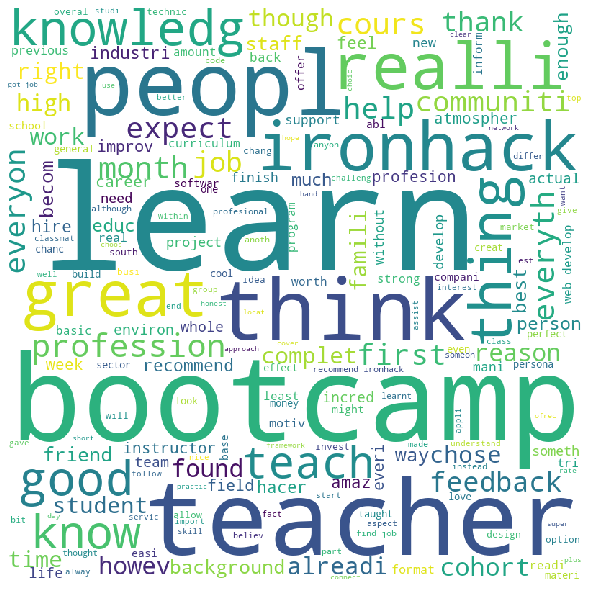

In [231]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(' '.join(stemmed_english)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

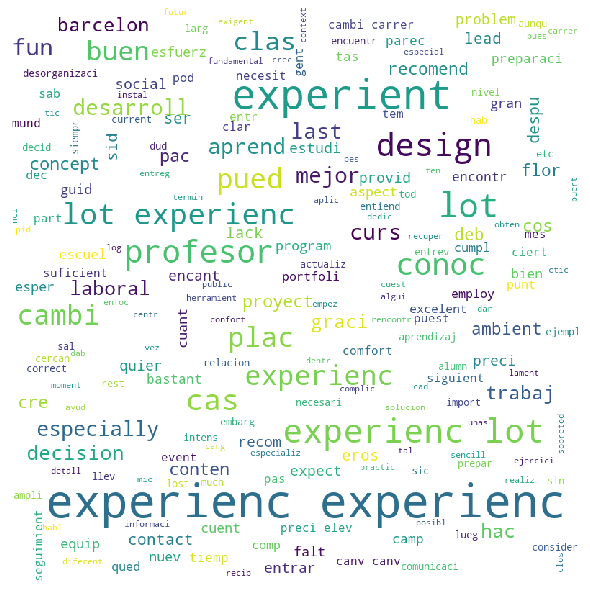

In [230]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',    
                min_font_size = 10).generate(' '.join(stemmed_spanish)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Now that the script is working we want to use it separately on bad NOS and good NPS comments 

### The comments we have are excellent, good, and bad

In [234]:
bad.head(2)
bad_comments = bad['Comment']

In [236]:
words_filtered_BC = []
for comment in bad_comments:
    words_filtered_BC.append(cleaning(comment))
words_BC = []
for lst in words_filtered_BC:
    for item in lst:
        words_BC.append(item)

In [237]:
english_BC = []
spanish_BC = []
not_recognized_BC = []
for item in words_BC:
    try:
        if detect(item) == 'es':
            spanish_BC.append(item)
        elif detect(item) == 'en':    
            english_BC.append(item)
        else:
            not_recognized_BC.append(item)
    except:
        pass

In [238]:
english2_BC = []
spanish2_BC = []
not_recognized2_BC = []
for item in not_recognized_BC:
    try:
        if detectlanguage.simple_detect(item) == 'es':
            spanish2_BC.append(item)
        elif detectlanguage.simple_detect(item) == 'en':    
            english2_BC.append(item)
        else:
            not_recognized2_BC.append(item)
    except:
        pass

In [239]:
english3_BC = []
spanish3_BC = []
not_recognized3_BC = []
for item in not_recognized2_BC:
    b = TextBlob(item)
    lang = b.detect_language()
    try:
        if lang == 'es':
            spanish3_BC.append(item)
        elif lang == 'en':    
            english3_BC.append(item)
        else:
            not_recognized3_BC.append(item)
    except:
        pass

In [240]:
spanish_words_BC = english_BC+english2_BC+english3_BC
english_words_BC = spanish_BC+spanish2_BC+spanish3_BC

In [241]:
with open("file_spanish_BC.txt", "w") as file:
    file.write(str(spanish_words_BC))
file.close()   
with open("file_english_BC.txt", "w") as file:
    file.write(str(english_words_BC))
file.close()

In [242]:
stemmed_english_BC = [sbEng.stem(item) for item in english_words_BC]
stemmed_spanish_BC = [sbEsp.stem(item) for item in spanish_words_BC]

In [243]:
englishFreq_BC = FreqDist(word for word in stemmed_english_BC)
for word, frequency in englishFreq_BC.most_common(20):
    print(u'{}: {}'.format(word, frequency))
spanishFreq_BC = FreqDist(word for word in stemmed_spanish_BC)
for word, frequency in englishFreq_BC.most_common(20):
    print(u'{}: {}'.format(word, frequency))

experi: 47
lot: 27
design: 26
experiencia: 15
clase: 12
profesor: 10
lack: 8
last: 8
canva: 7
conocimiento: 7
precio: 6
especi: 6
portfolio: 5
problema: 4
guid: 4
case: 4
contenido: 4
contacto: 4
bueno: 4
social: 4
experi: 47
lot: 27
design: 26
experiencia: 15
clase: 12
profesor: 10
lack: 8
last: 8
canva: 7
conocimiento: 7
precio: 6
especi: 6
portfolio: 5
problema: 4
guid: 4
case: 4
contenido: 4
contacto: 4
bueno: 4
social: 4


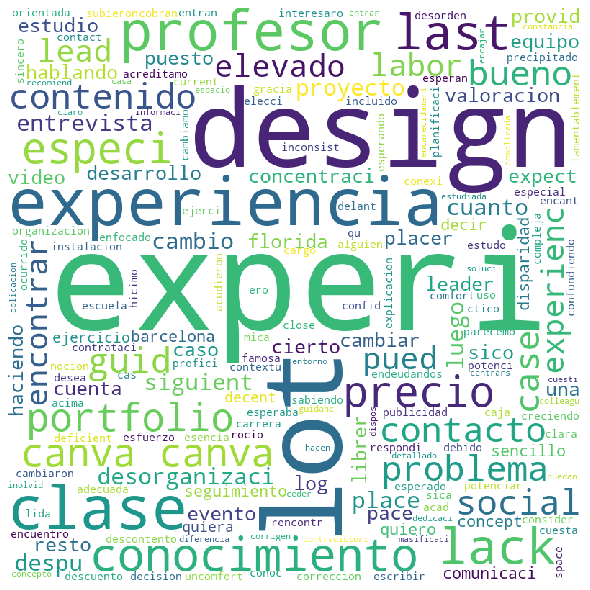

In [244]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(' '.join(stemmed_english_BC)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

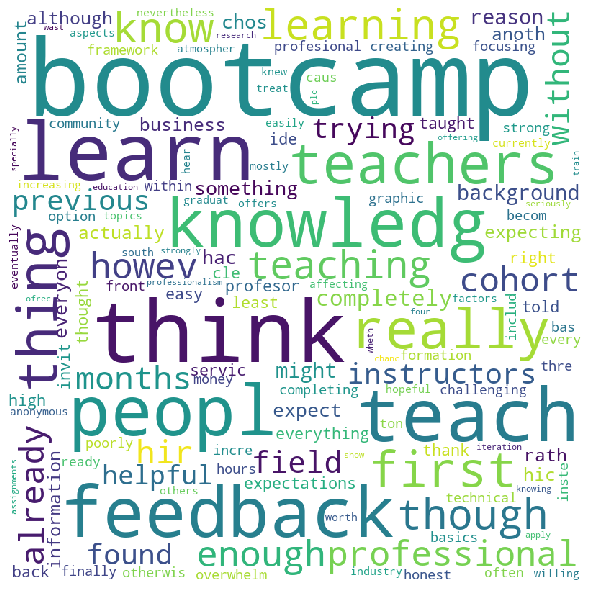

In [245]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(' '.join(stemmed_spanish_BC)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 